# Chapter 8: Linear regression and logistic regression


### 8.1. Regression and classification
> ###### 8.1.1. Reminder about regression
> ###### 8.1.2. Understand the classification

### 8.2. Linear regression
> ###### 8.2.1. Preparation of data
> ###### 8.2.2. Implementation of the model
> ###### 8.2.3. Predictions and backtest

### 8.3. Logistic regression
> ###### 8.3.1. Preparation of data 
> ###### 8.3.2. Implementation of the model
> ###### 8.3.3. Predictions and backtest

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *
from datetime import datetime

### 8.2.1. Preparation of data

In [72]:
# Import The data
df = yf.download('^GSPC', end=datetime.today().strftime('%Y-%m-%d'))[["Adj Close"]].pct_change(1)

# Create a X
df["Adj Close t-1"] = df[["Adj Close"]].shift(1)

# Drop missing values
df = df.dropna()

[*********************100%***********************]  1 of 1 completed


In [73]:
# Percentage train set
split = int(0.80*len(df))

# Train set creation
X_train = df[["Adj Close t-1"]].iloc[:split]
y_train = df[["Adj Close"]].iloc[:split]

# Test set creation
X_test = df[["Adj Close t-1"]].iloc[split:]
y_test = df[["Adj Close"]].iloc[split:]

### 8.2.2. Implementation of the model

In [74]:
# Import the class
from sklearn.linear_model import LinearRegression

# Initialize the class
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
# This command return the coefficients of the model
lr.coef_

array([[0.07222493]])

In [76]:
# This command return the intercept of the model
lr.intercept_

array([0.00031764])

### 8.2.3. Predictions and backtest

[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.064 	 Alpha: -10.3 %	     Sharpe: -0.466 	 Sortino: -0.541
  -----------------------------------------------------------------------------
    VaR: 58.49 %	 cVaR: 65.27 % 	     VaR/cVaR: 1.116 	 drawdown: 84.95 %
  -----------------------------------------------------------------------------


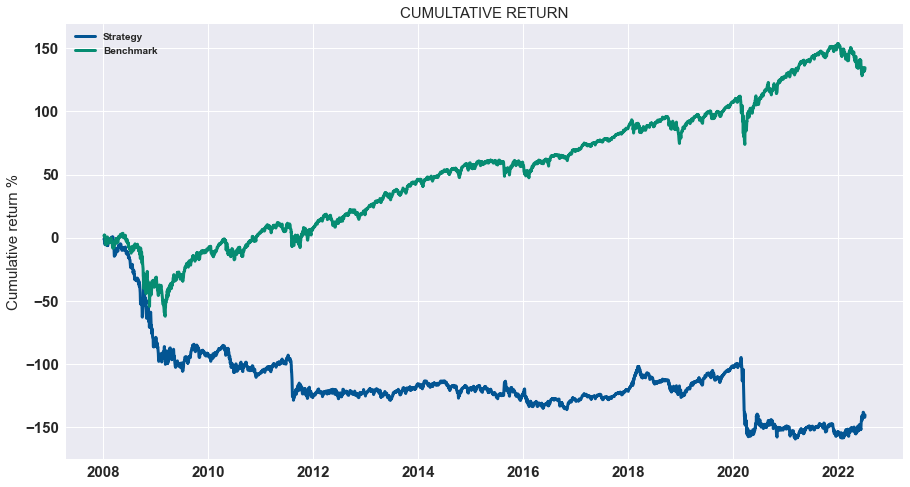

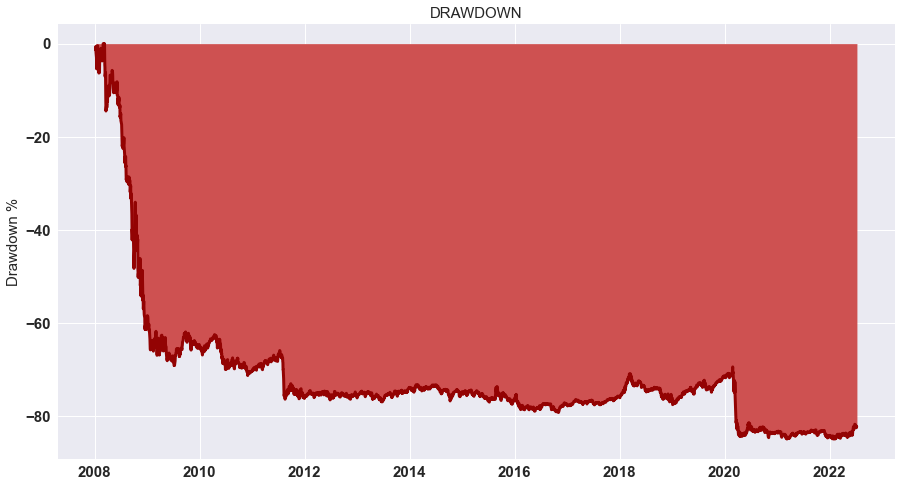

In [77]:
# Create predictions for the whole dataset
df["prediction"] = lr.predict(df[["Adj Close t-1"]])

# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["Adj Close"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])

### 8.3.1. Preparation of data

In [82]:
# Percentage train set
split = int(0.75*len(df))

# Train sets creation
X_train = df[["Adj Close t-1"]].iloc[:split]
y_train = np.round(df[["Adj Close"]].iloc[:split]+0.5)

# Test sets creation
X_test = df[["Adj Close t-1"]].iloc[split:]
y_test = np.round(df[["Adj Close"]].iloc[split:]+0.5)

### 8.3.2. Implementation of the model

In [79]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Initialize the class
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

### 8.3.3. Predictions and backtest

Date
1950-01-05    1
1950-01-06    1
1950-01-09    1
1950-01-10    1
1950-01-11    1
Name: prediction, dtype: int32
[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.834 	 Alpha: 0.15 %	     Sharpe: 0.474 	 Sortino: 0.608
  -----------------------------------------------------------------------------
    VaR: 29.22 %	 cVaR: 34.48 % 	     VaR/cVaR: 1.18 	 drawdown: 71.69 %
  -----------------------------------------------------------------------------


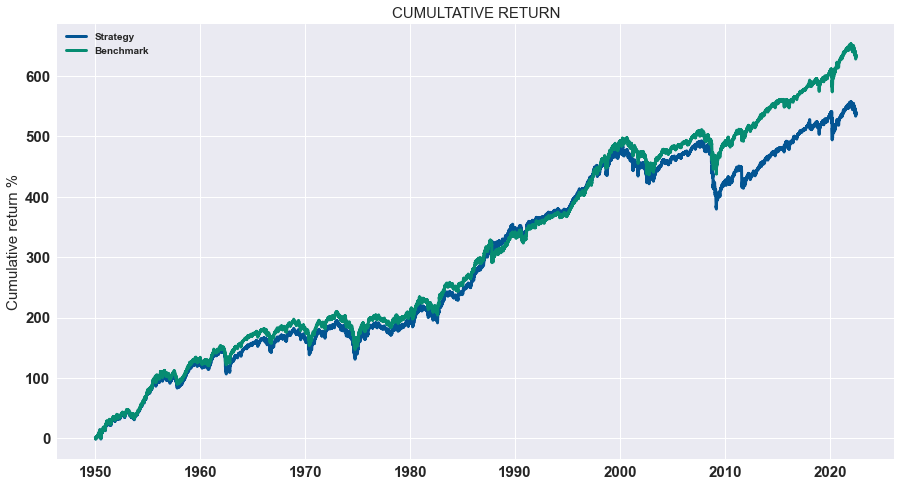

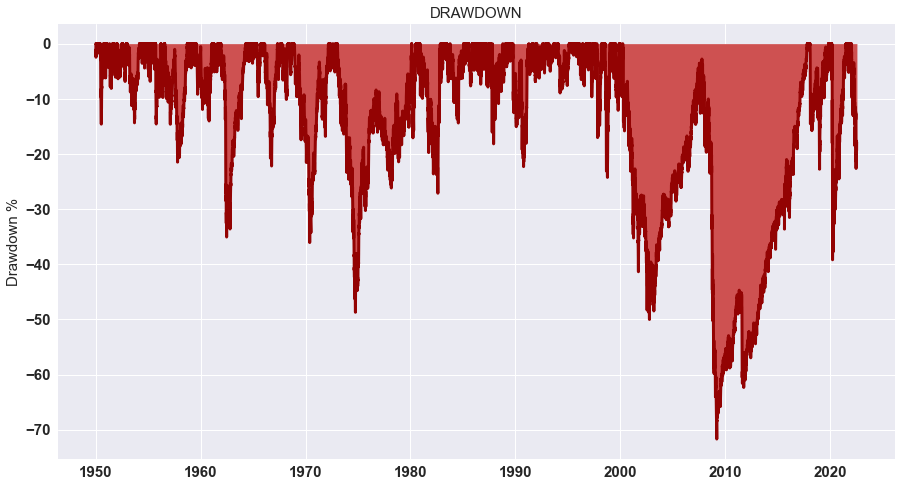

In [81]:
# Create predictions
df["prediction"] = lr.predict(df[["Adj Close t-1"]])

# Create the positions
df["prediction"] = np.where(df["prediction"]==0, -1, 1)
print(df["prediction"].head())

# Compute the returns of the strategy
df["strategy"] = np.sign(df["prediction"]) * df["Adj Close"]
backtest_dynamic_portfolio(df["strategy"])